In [1]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Загрузка и анализ набора данных
raw_dataset = pandas.read_csv('machine.data.csv', header=None) # Убедиться в правильности пути к файлу!
raw_dataset.head(10) # Вывод первых 10 строк

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [3]:
# Размер набора данных
print(raw_dataset.shape)

(209, 10)


In [4]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pandas.DataFrame()

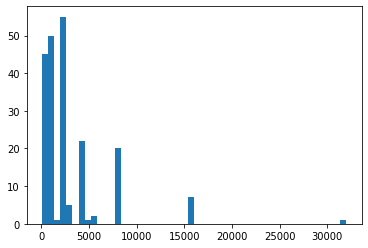

In [5]:
# Обработка данных в столбце №3 (MMIN: minimum main memory in kilobytes (integer))

# Загружаем данные
data = raw_dataset[3]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

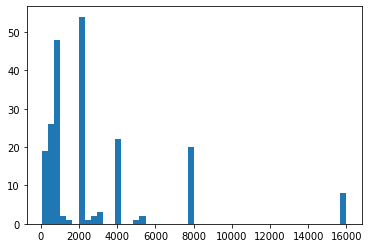

In [6]:
# Наблюдаем проблему №4 - выброс в районе 32000. Применяем отсечение с разрешенным интервалом от 0 до 16000.
data = numpy.clip(data, 0, 16000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

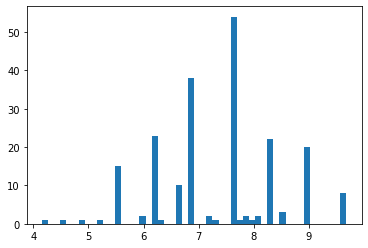

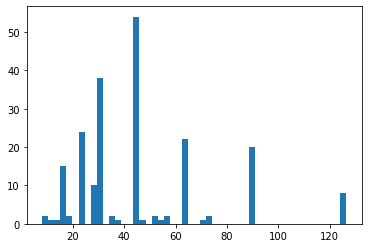

In [7]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [8]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [9]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

4.1588830833596715
9.680344001221918


In [10]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

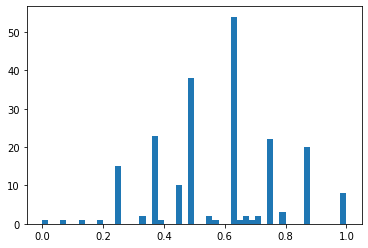

In [11]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

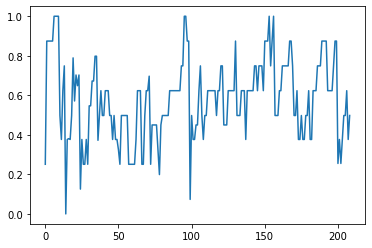

In [12]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [13]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [14]:
# Конвертируем в одномерный массив
data = data.flatten()

In [15]:
# Сохраняем в итоговом наборе данных
dataset['MMIN'] = data

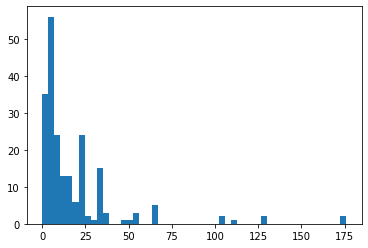

In [16]:
# Обработка данных в столбце №7 (CHMAX: maximum channels in units (integer))

# Загружаем данные
data = raw_dataset[7]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

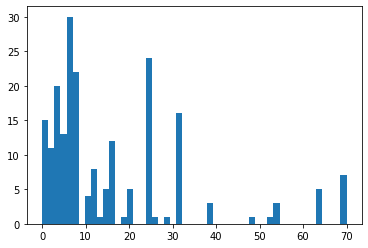

In [17]:
# Наблюдаем проблему №4 - выбросы значений в интервале (100, 175). Применяем отсечение с разрешенным интервалом от 0 до 70.
data = numpy.clip(data, 0, 70)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

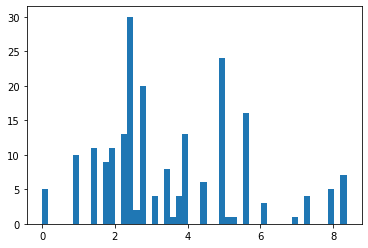

In [18]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Применять логарифм нельзя, т.к. среди значений есть нули.
# Применим извлечение квадратного корня.

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [19]:
data = data ** 0.5

In [20]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

0.0
8.366600265340756


In [21]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

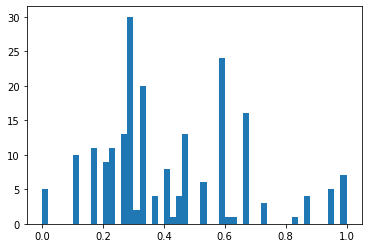

In [22]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

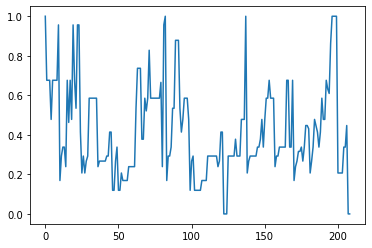

In [23]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [24]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [25]:
# Конвертируем в одномерный массив
data = data.flatten()

In [26]:
# Сохраняем в итоговом наборе данных
dataset['CHMAX'] = data

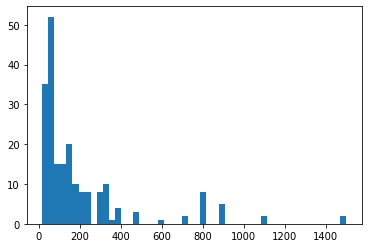

In [28]:
# Обработка данных в столбце №2 (MYCT – машинный цикл в наносекундах. (integer))

# Загружаем данные
data = raw_dataset[2]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

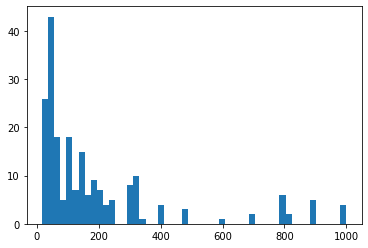

In [29]:
# Наблюдаем проблему №4 - выбросы значений в интервале (1000, 1500). Применяем отсечение с разрешенным интервалом от 0 до 1000.
data = numpy.clip(data, 0, 1000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

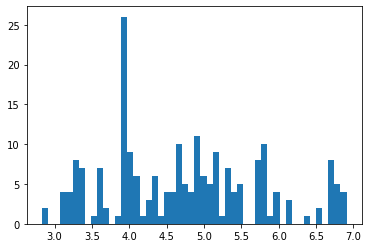

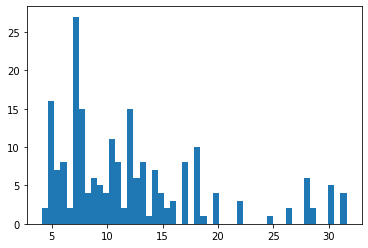

In [30]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [31]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [32]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

2.833213344056216
6.907755278982137


In [33]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

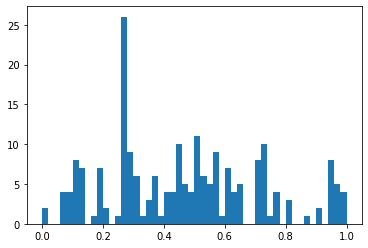

In [34]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

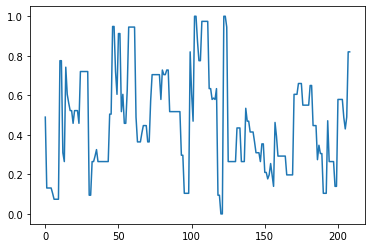

In [35]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [36]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [37]:
# Конвертируем в одномерный массив
data = data.flatten()

In [38]:
# Сохраняем в итоговом наборе данных
dataset['MYCT'] = data

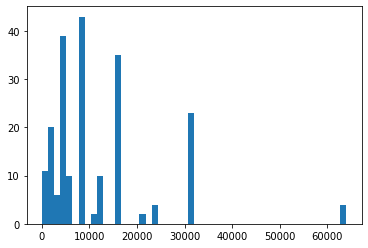

In [75]:
# Обработка данных в столбце №4 (MMAX – максимальный размер памяти в килобайтах. (integer))

# Загружаем данные
data = raw_dataset[4]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

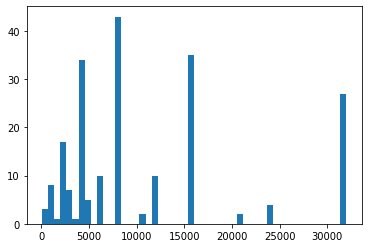

In [76]:
# Наблюдаем проблему №4 - выбросы значений в районе 64000. Применяем отсечение с разрешенным интервалом от 0 до 32000.
data = numpy.clip(data, 0, 32000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

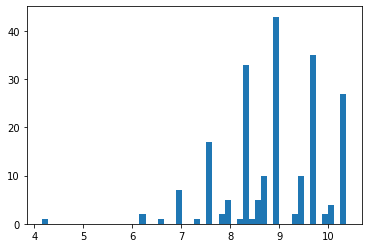

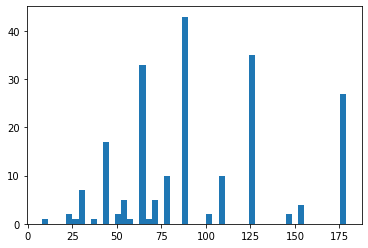

In [77]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [78]:
# Корень даёт более равномерно распределенные данные, используем его
data = data**0.5

In [79]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

8.0
178.88543819998318


In [81]:
# Приводим значения к интервалу N(0, 1), считая, что они ближе к нормальному распределению
scaler = StandardScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

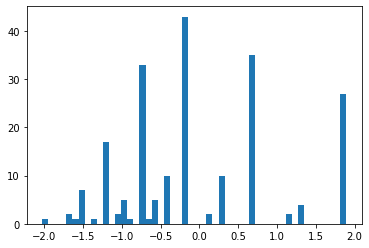

In [82]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

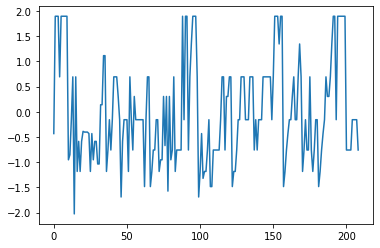

In [83]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [84]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [85]:
# Конвертируем в одномерный массив
data = data.flatten()
# Сохраняем в итоговом наборе данных
dataset['MMAX'] = data

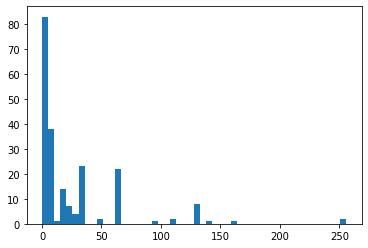

In [99]:
# Обработка данных в столбце №5 (CACH – размер кэша в килобайтах (integer))

# Загружаем данные
data = raw_dataset[5]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

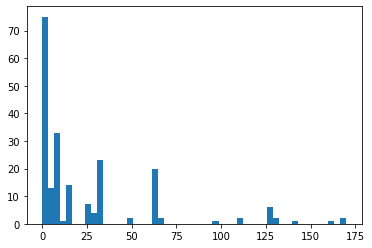

In [100]:
# Наблюдаем проблему №4 - выбросы значений в районе 256. Применяем отсечение с разрешенным интервалом от 0 до 170.
data = numpy.clip(data, 0, 170)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

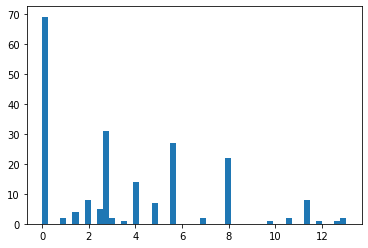

In [101]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным извлечение квадратного корня.
matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()


In [102]:
data = data**0.5
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

0.0
13.038404810405298


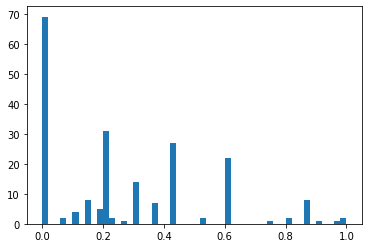

In [103]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

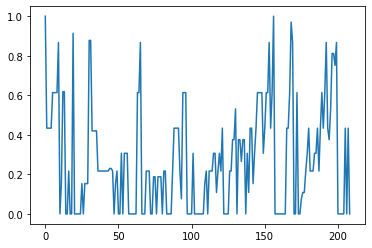

In [104]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [105]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [106]:
# Конвертируем в одномерный массив
data = data.flatten()
# Сохраняем в итоговом наборе данных
dataset['CASH'] = data

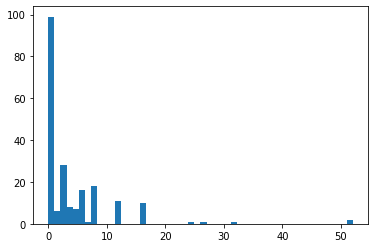

In [108]:
# Обработка данных в столбце №6 (CHMIN – минимальное количество каналов. (integer))

# Загружаем данные
data = raw_dataset[6]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

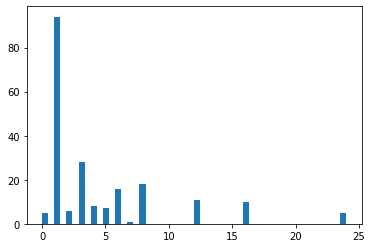

In [109]:
# Наблюдаем проблему №4 - выбросы значений в интервале (24, 52). Применяем отсечение с разрешенным интервалом от 0 до 24.
data = numpy.clip(data, 0, 24)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

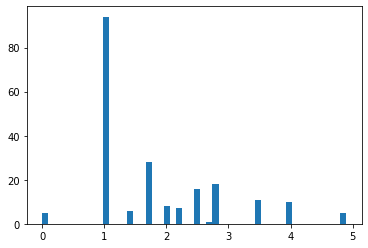

In [111]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным извлечение квадратного корня.
matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [112]:
data = data**0.5
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

0.0
4.898979485566356


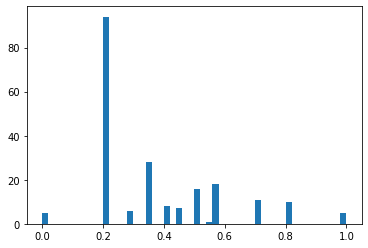

In [113]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

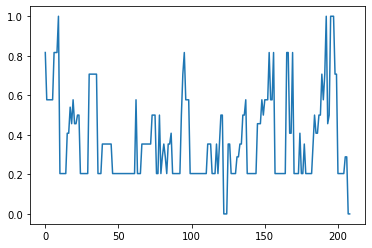

In [114]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [115]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [116]:
# Конвертируем в одномерный массив
data = data.flatten()
# Сохраняем в итоговом наборе данных
dataset['CHMIN'] = data

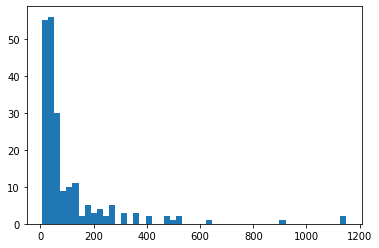

In [118]:
# Обработка данных в столбце №8 (PRP – опубликованная относительная производительность. (integer))

# Загружаем данные
data = raw_dataset[8]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

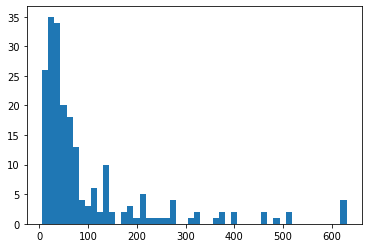

In [119]:
# Наблюдаем проблему №4 - выбросы значений в интервале (850, 1200). Применяем отсечение с разрешенным интервалом от 0 до 630.
data = numpy.clip(data, 0, 630)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

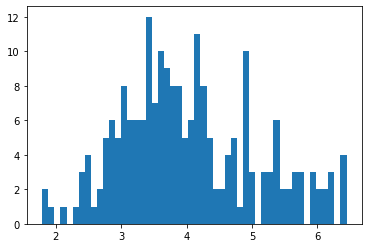

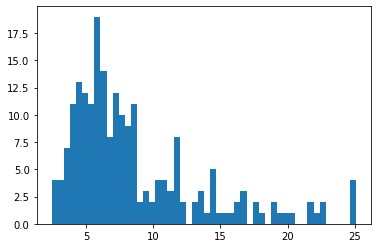

In [120]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [121]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

1.791759469228055
6.4457198193855785


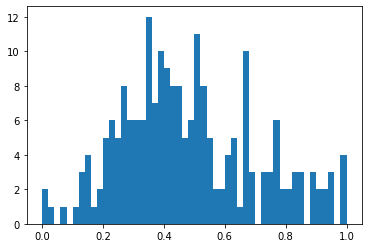

In [122]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

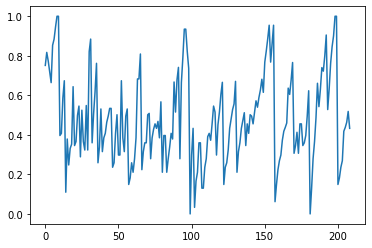

In [123]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [124]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [125]:
# Конвертируем в одномерный массив
data = data.flatten()
# Сохраняем в итоговом наборе данных
dataset['PRP'] = data

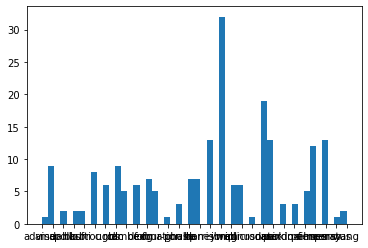

In [145]:
# Обработка данных в столбце №0 (Vendor name – название производителя процессора. (string))

# Загружаем данные
data = raw_dataset[0]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

In [149]:
# Т.к. параметр является строкой, применим прямое унитарное кодирование
data = pandas.get_dummies(data)
dataset = dataset.join(data)

In [150]:
print(dataset)

         MMIN     CHMAX      MYCT      MMAX      CASH     CHMIN       PRP  \
0    0.251074  1.000000  0.489650 -0.433388  1.000000  0.816497  0.751297   
1    0.874463  0.676123  0.131078  1.893394  0.433861  0.577350  0.817143   
2    0.874463  0.676123  0.131078  1.893394  0.433861  0.577350  0.773936   
3    0.874463  0.676123  0.131078  1.893394  0.433861  0.577350  0.721049   
4    0.874463  0.478091  0.131078  0.691429  0.433861  0.577350  0.664175   
..        ...       ...       ...       ...       ...       ...       ...   
204  0.497852  0.338062  0.487679 -0.158488  0.000000  0.204124  0.418119   
205  0.497852  0.338062  0.429927 -0.158488  0.433861  0.288675  0.437666   
206  0.623389  0.447214  0.489650 -0.158488  0.000000  0.288675  0.464010   
207  0.376611  0.000000  0.819865 -0.158488  0.433861  0.000000  0.518469   
208  0.497852  0.000000  0.819865 -0.759470  0.000000  0.000000  0.432944   

     adviser  amdahl  apollo  ...  microdata  nas  ncr  nixdorf  perkin-elm

In [151]:
dataset.to_csv('prepared_data.csv')